# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

完成并连同作业缴交此完整的工作表(包括其输出及工作表外的任何支援程式码)。

更多详情请参见课程网站上的[assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html)

我们已经看到，通过训练一个基于输入图像像素的线性分类器，我们可以在一个图像分类任务上获得合理的性能。

在这个练习中，我们将展示我们可以通过训练线性分类器来提高我们的分类性能，不是在原始像素上，而是在从原始像素计算出来的特征上。

你这次练习的所有工作都将在这个笔记本上完成。

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
#     cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    cifar10_dir = 'E:\cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

对于每个图像，我们将计算一个**方向梯度直方图(HOG)**，

以及使用**HSV颜色空间**中的色调通道的**颜色直方图**。

我们通过连接**方向梯度直方图**和**颜色直方图**特征向量来形成每个图像的最终特征向量。

粗略地说，**方向梯度直方图**应该在忽略颜色信息的情况下捕捉图像的**纹理**，

而**颜色直方图**则代表忽略纹理的情况下输入图像的**颜色**。

因此，我们期望两者一起使用应该比单独使用更好。

为了自己的利益，验证这个假设是一件好事。

`hog_feature`和`color_histogram_hsv`函数都对单个图像进行操作，并为该图像返回一个特征向量。

extract_features函数获取一组图像和一组特征函数，

并对每个图像上的每个特征函数求值，将结果存储在一个矩阵中，其中每一列是单个图像的所有特征向量的连接。

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale. 这确保了每个特性具有大致相同的范围。
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; 

this should achieve better results than training SVMs directly on top of raw pixels.

使用之前开发的多类支持向量机代码，在上述**特征**的基础上训练支持向量机;

这应该比直接在**原始像素**上训练支持向量机得到更好的结果。

In [4]:
# Use the validation set to tune the learning rate and regularization strength
# 使用验证集来调整学习速率和正则化强度
from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# 使用验证集设置学习速率和正则化强度。
# 这应该与SVM的验证相同;
# 保存最佳训练分类器到best_svm中。
# 您可能还想在颜色直方图中使用不同数量的箱子。
# 如果你很小心的话，你应该能够在验证集上获得接近0.44的精度。
pass
for rs in regularization_strengths:
    for lr in learning_rates:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, lr, rs, num_iters=6000)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,rs)] = train_accuracy, val_accuracy
                
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.103776 val accuracy: 0.104000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.131061 val accuracy: 0.128000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.413082 val accuracy: 0.412000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.134633 val accuracy: 0.125000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.416796 val accuracy: 0.421000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.406735 val accuracy: 0.392000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.417531 val accuracy: 0.417000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.411041 val accuracy: 0.407000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.356796 val accuracy: 0.359000
best validation accuracy achieved during cross-validation: 0.421000


In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


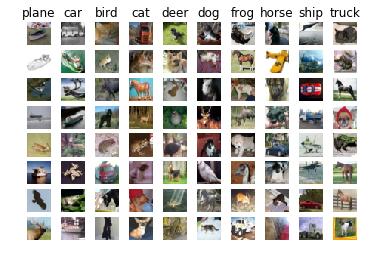

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
# 获得算法工作原理的直觉的一个重要方法是将它所犯的错误形象化。
# 在这个可视化中，我们展示了被当前系统错误分类的图像示例。
# 第一列显示了我们的系统标记为“plane”，但其真正的标记不是“plane”。
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$




## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

在此之前，我们看到在原始像素上训练一个**两层神经网络**比在原始像素上训练**线性分类器**获得更好的分类性能。

在这个本子中，我们已经看到线性分类器在**图像特征**上胜过线性分类器在**原始像素**上。

为了完整性，我们也应该尝试训练一个**神经网络**的**图像特征**。

这种方法应该优于所有以前的方法:

您应该能够轻松地在测试集上获得超过55%的分类精度;

我们的最佳模型达到了60%的分类准确率。

In [7]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# 在图像特征上训练一个双层神经网络。
# 您可能想要交叉验证前面几节中提到的各种参数。
# 将您的最佳模型存储在best_net变量中。
pass
results = {}
best_val = -1
best_net = None

learning_rates = [1e-2 ,1e-1, 5e-1, 1, 5]
regularization_strengths = [1e-3, 5e-3, 1e-2, 1e-1, 0.5, 1]

for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=1500, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg= reg, verbose=False)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc

# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print('lr %e reg %e val accuracy: %f' % (lr, reg,  val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


C:\Users\zzz\Desktop\spring1819_assignment123\assignment1\cs231n\classifiers\neural_net.py:130: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(softmax_output[range(N), list(y)]))
C:\Users\zzz\Desktop\spring1819_assignment123\assignment1\cs231n\classifiers\neural_net.py:125: RuntimeWarning: overflow encountered in subtract
  shift_scores = scores - np.max(scores, axis = 1).reshape(-1,1)
C:\Users\zzz\Desktop\spring1819_assignment123\assignment1\cs231n\classifiers\neural_net.py:125: RuntimeWarning: invalid value encountered in subtract
  shift_scores = scores - np.max(scores, axis = 1).reshape(-1,1)
C:\Users\zzz\Desktop\spring1819_assignment123\assignment1\cs231n\classifiers\neural_net.py:154: RuntimeWarning: invalid value encountered in greater
  dh_ReLu = (h_output > 0) * dh
C:\Users\zzz\Desktop\spring1819_assignment123\assignment1\cs231n\classifiers\neural_net.py:132: RuntimeWarning: overflow encountered in double_scalars
  loss +=  0.5* reg * (np.sum(W1 * W1

lr 1.000000e-02 reg 1.000000e-03 val accuracy: 0.198000
lr 1.000000e-02 reg 5.000000e-03 val accuracy: 0.180000
lr 1.000000e-02 reg 1.000000e-02 val accuracy: 0.087000
lr 1.000000e-02 reg 1.000000e-01 val accuracy: 0.079000
lr 1.000000e-02 reg 5.000000e-01 val accuracy: 0.078000
lr 1.000000e-02 reg 1.000000e+00 val accuracy: 0.098000
lr 1.000000e-01 reg 1.000000e-03 val accuracy: 0.529000
lr 1.000000e-01 reg 5.000000e-03 val accuracy: 0.518000
lr 1.000000e-01 reg 1.000000e-02 val accuracy: 0.505000
lr 1.000000e-01 reg 1.000000e-01 val accuracy: 0.423000
lr 1.000000e-01 reg 5.000000e-01 val accuracy: 0.105000
lr 1.000000e-01 reg 1.000000e+00 val accuracy: 0.102000
lr 5.000000e-01 reg 1.000000e-03 val accuracy: 0.583000
lr 5.000000e-01 reg 5.000000e-03 val accuracy: 0.558000
lr 5.000000e-01 reg 1.000000e-02 val accuracy: 0.533000
lr 5.000000e-01 reg 1.000000e-01 val accuracy: 0.391000
lr 5.000000e-01 reg 5.000000e-01 val accuracy: 0.107000
lr 5.000000e-01 reg 1.000000e+00 val accuracy: 0

In [9]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.
# 在测试集中运行你最好的神经网络分类器。
# 你应该能够得到超过55%的准确率。
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.568
